<a href="https://colab.research.google.com/github/Tsutomu-dayoo/DNN_lerning/blob/master/dataset_preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(455, 256, 3)


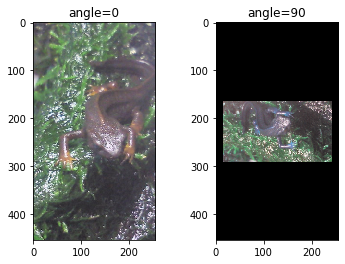

In [34]:
import numpy
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('drive/My Drive/images/akahara/akahara_0001.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
rows,cols = img.shape[0:2]

angle = 90
M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,#)
dst = cv2.warpAffine(img,M,(cols,rows))
dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.title("angle=0")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("angle={}".format(angle))
plt.imshow(dst)


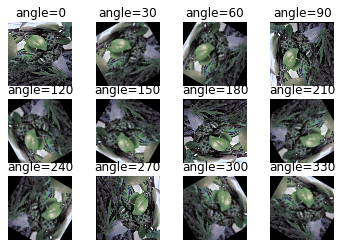

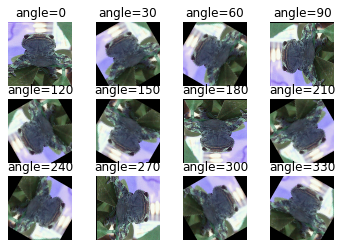

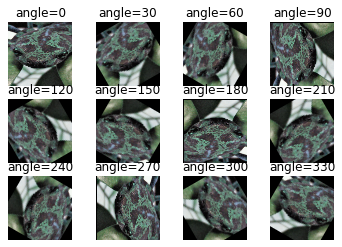

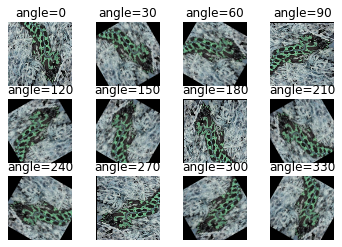

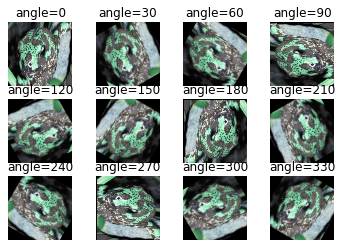

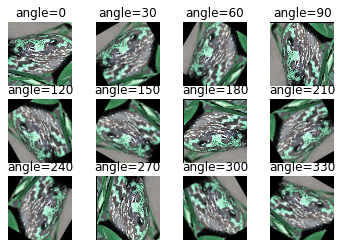

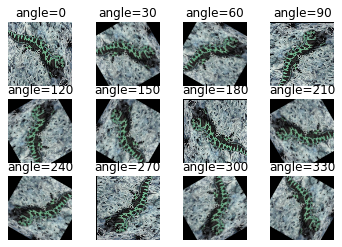

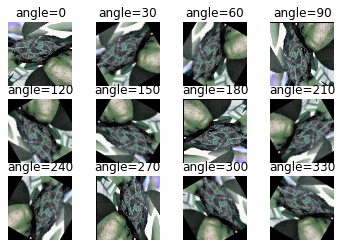

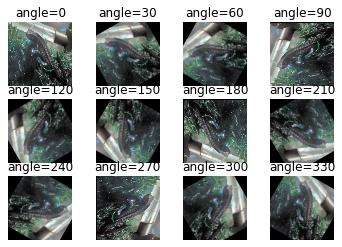

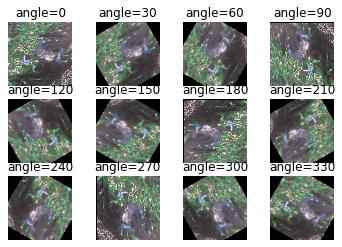

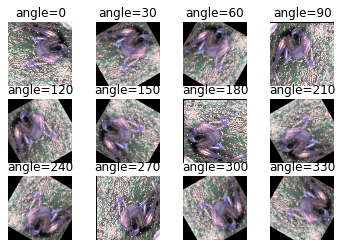

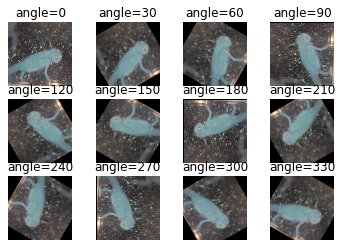

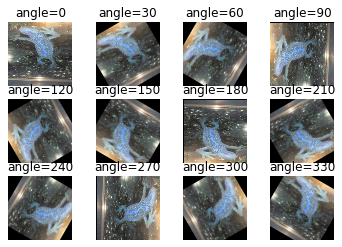

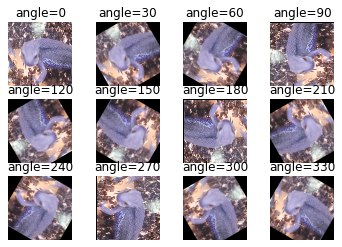

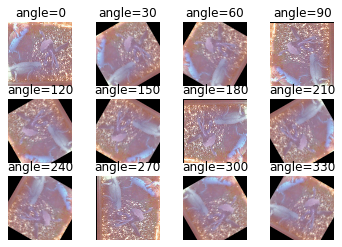

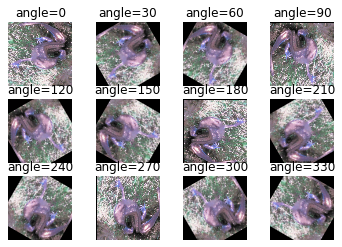

In [47]:
import cv2
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import copy

num_classes = 2
img_height, img_width = 64, 64

CLS = ['akahara', 'madara'] #akahara->0, madara->1
path = 'drive/My Drive/images/'

def data_load(path, hf = False, vf = False, rot = False): #hf:左右反転、vf:上下反転、rot;回転
    xs = []
    ts = []
    paths = []

    for dir_path in glob(path + '/*'):
      for path in glob(dir_path + '/*'):
        x = cv2.imread(path)
        x = cv2.resize(x, (img_width, img_height)).astype(np.float32)
        x /= 255. #255で割って[0,1]の間に正規化する
        xs.append(x) #画像情報を配列化
        x2 = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

        for i, cls in enumerate(CLS): #akahara->0, madara->1　インデックスと要素を取得
          if cls in path:#要素の名前と同じファイル名があればその数字でラベル付け
            t = i
            ts.append(i)#対応するラベルを配列化

            paths.append(path)#対応するラベルを配列化

            if hf:#左右反転なのでピクセルの列を逆から取得して配置すればいい
              xs.append(x[:,::-1])
              ts.append(t)
              paths.append(path)
            if vf:#上下反転なのでピクセルの行を逆から取得して配置
              xs.append(x[::-1])
              ts.append(t)
              paths.append(path)
            if hf and vf:
              xs.append(x[::-1, ::-1])
              ts.append(t)
              paths.append(path)
            if rot != False:
              angle = rot
              scale = 1

              # show
              a_num = 360 // rot#//で割り算の商のみを取得
              w_num = np.ceil(np.sqrt(a_num))
              h_num = np.ceil(a_num / w_num)
              count = 1
              plt.subplot(h_num, w_num, count)
              plt.axis('off')
              plt.imshow(x)
              plt.title("angle=0")

              while angle < 360:
                _w,_h,_c = x.shape#横、縦、RGMを取得
                max_size = max(_w,_h)
                tem = np.zeros((max_size,max_size,_c))#０で初期化
                tx = int((max_size - _w) / 2)
                ty = int((max_size - _h) / 2)
                tem[ty: ty+_h, tx: tx+_w] = x.copy()
                M = cv2.getRotationMatrix2D((max_size/2,max_size/2),angle,1)#cv2.getRotationMatrix2D((回転の中心),回転角度,倍率)
                _x = cv2.warpAffine(tem,M,(max_size,max_size))
                _x = _x[tx:tx+_w,ty:ty+_h]
                xs.append(x)
                ts.append(t)
                paths.append(path)

                # show
                count += 1
                plt.subplot(h_num, w_num, count)
                plt.imshow(_x)
                plt.axis('off')
                plt.title("angle={}".format(angle))

                angle += rot
            plt.show()

    xs = np.array(xs, dtype=np.float32)#行列化
    ts = np.array(ts, dtype=np.int)
    xs = xs.transpose(0,3,1,2)

    return xs, ts, paths

xs, ts, paths = data_load('drive/My Drive/images/',hf=False,vf=False,rot=30)

mb = 3#ミニバッチの数
mbi = 0
train_ind = np.arange(len(paths))#data数を数える->[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
np.random.shuffle(train_ind)#引数をランダムにして元の引数に戻す、この場合はtrain_indをそのまま使える

epoch_max = 3
epoch = 0

while epoch < epoch_max:
  if mbi + mb > len(xs):
      mb_ind = copy.copy(train_ind)[mbi:]
      np.random.shuffle(train_ind)
      mb_ind = np.hstack((mb_ind, train_ind[:(mb-(len(xs)-mbi))]))
      mbi = mb - (len(xs) - mbi)
      epoch += 1
  else:
      mb_ind = train_ind[mbi: mbi+mb]
      mbi += mb

  #print(mb_ind)

In [34]:
a = np.arange(12).reshape((3, 4))
print(a)
print("")
print(a[::-1])#上下反転
print("")
print(a[:,::-1])#左右反転
print("")
print(a[0,::-1])#一行目だけ左右反転
print("")
print(a[:,0::-1])#一列目だけ左右反転

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 8  9 10 11]
 [ 4  5  6  7]
 [ 0  1  2  3]]

[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]

[3 2 1 0]

[[0]
 [4]
 [8]]


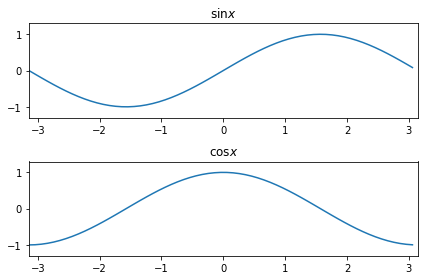

In [9]:
import numpy
import cv2
from matplotlib import pyplot as plt

xmin, xmax = -np.pi, np.pi
x = np.arange(xmin, xmax, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# sinのプロット
plt.subplot(2, 1, 1)#plt.subplot(行数, 列数, 何番目のプロットか)
plt.plot(x, y_sin)
plt.title(r"$\sin x$")
plt.xlim(xmin, xmax)
plt.ylim(-1.3, 1.3)

# cosのプロット
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title(r"$\cos x$")
plt.xlim(xmin, xmax)
plt.ylim(-1.3, 1.3)

plt.tight_layout()  # タイトルの被りを防ぐ